In [1]:
import pandas as pd


In [2]:
submission_path = './submit_0134fold_neteb2s526.csv'
train_s2_path = './stage_2_train.csv'
test_s1_path = './stage_1_sample_submission.csv'
sub = pd.read_csv(submission_path)
train_s2 = pd.read_csv(train_s2_path)
train_s2.head
test_s1 = pd.read_csv(test_s1_path)

In [3]:
test_s1_label = train_s2[train_s2.ID.isin(test_s1.ID)].reset_index().drop(['index'],axis=1)
test_s1_label.sort_values(by=['ID'],inplace=True)
test_s1_label.reset_index(inplace=True)
test_s1_label.drop('index',axis=1,inplace =True)
test_s1_label
#test_s1_label.to_csv('./test_1_label.csv')

,ID,Label
0,ID_000012eaf_any,0
1,ID_000012eaf_epidural,0
2,ID_000012eaf_intraparenchymal,0
3,ID_000012eaf_intraventricular,0
4,ID_000012eaf_subarachnoid,0
...,...,...
471265,ID_ffffcbff8_epidural,0
471266,ID_ffffcbff8_intraparenchymal,0
471267,ID_ffffcbff8_intraventricular,0
471268,ID_ffffcbff8_subarachnoid,0


In [4]:
sub.sort_values(by='ID',inplace = True)
sub.reset_index(inplace=True)
sub.drop('index',axis=1,inplace =True)
sub.head(11)

,ID,Label
0,ID_000012eaf_any,0.013327
1,ID_000012eaf_epidural,0.000489
2,ID_000012eaf_intraparenchymal,0.011431
3,ID_000012eaf_intraventricular,0.000436
4,ID_000012eaf_subarachnoid,0.002288
5,ID_000012eaf_subdural,0.007292
6,ID_0000ca2f6_any,0.004053
7,ID_0000ca2f6_epidural,0.000083
8,ID_0000ca2f6_intraparenchymal,0.001685
9,ID_0000ca2f6_intraventricular,0.000500


In [5]:
#sub.loc[sub.Label>0.5,'Label'] = 1
#sub

In [6]:
#sub.loc[sub.Label<0.5,'Label'] = 0

In [7]:
#sub

In [8]:
sub_new = sub
sub_new[['N','ID','Diagnosis']] = sub['ID'].str.split('_', expand=True)
sub_new.drop_duplicates(inplace=True)
sub_new

,ID,Label,N,Diagnosis
0,000012eaf,0.013327,ID,any
1,000012eaf,0.000489,ID,epidural
2,000012eaf,0.011431,ID,intraparenchymal
3,000012eaf,0.000436,ID,intraventricular
4,000012eaf,0.002288,ID,subarachnoid
...,...,...,...,...
471265,ffffcbff8,0.000219,ID,epidural
471266,ffffcbff8,0.001493,ID,intraparenchymal
471267,ffffcbff8,0.006895,ID,intraventricular
471268,ffffcbff8,0.001837,ID,subarachnoid


In [9]:
sub_new = sub_new.pivot(index='ID', columns='Diagnosis', values='Label').reset_index()
sub_new

Diagnosis,ID,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural
0,000012eaf,0.013327,0.000489,0.011431,4.357843e-04,0.002288,0.007292
1,0000ca2f6,0.004053,0.000083,0.001685,4.995312e-04,0.001110,0.001185
2,000259ccf,0.000510,0.000053,0.000059,4.276353e-06,0.000119,0.000481
3,0002d438a,0.001873,0.000039,0.000495,2.874322e-04,0.000280,0.000906
4,00032d440,0.050483,0.005943,0.003785,3.262796e-03,0.019032,0.021581
...,...,...,...,...,...,...,...
78540,fffe2edb8,0.950570,0.000520,0.822349,1.940034e-01,0.031224,0.011303
78541,ffff3212e,0.000095,0.000012,0.000002,5.259638e-07,0.000015,0.000047
78542,ffff59a97,0.000049,0.000004,0.000020,9.392490e-07,0.000015,0.000041
78543,ffffb670a,0.128686,0.000757,0.002236,4.532813e-02,0.038114,0.007458


In [10]:
test_s1_label_new = test_s1_label
test_s1_label_new[['N','ID','Diagnosis']] = test_s1_label_new['ID'].str.split('_', expand=True)
test_s1_label_new.drop_duplicates(inplace=True)
test_s1_label_new = test_s1_label_new.pivot(index='ID', columns='Diagnosis', values='Label').reset_index()
test_s1_label_new


Diagnosis,ID,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural
0,000012eaf,0,0,0,0,0,0
1,0000ca2f6,0,0,0,0,0,0
2,000259ccf,0,0,0,0,0,0
3,0002d438a,0,0,0,0,0,0
4,00032d440,0,0,0,0,0,0
...,...,...,...,...,...,...,...
78540,fffe2edb8,1,0,1,1,0,0
78541,ffff3212e,0,0,0,0,0,0
78542,ffff59a97,0,0,0,0,0,0
78543,ffffb670a,1,0,0,0,1,0


In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [12]:
import seaborn as sn

In [14]:
from sklearn.metrics import roc_curve

In [15]:
y_true = test_s1_label_new['any']
y_pred = sub_new['any']
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

In [16]:
from matplotlib import pyplot as plt
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

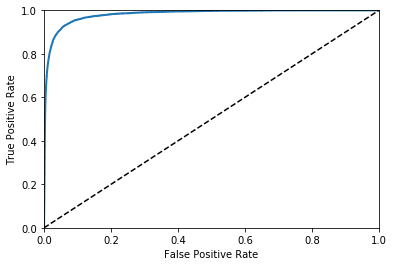

In [17]:
plot_roc_curve(fpr, tpr)
plt.show()

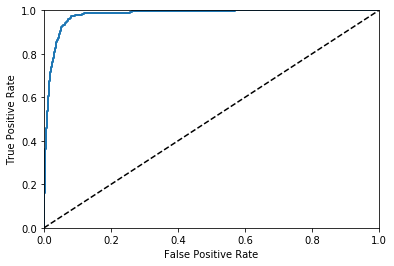

In [18]:
y_true = test_s1_label_new['epidural']
y_pred = sub_new['epidural']
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
plot_roc_curve(fpr, tpr)
plt.show()

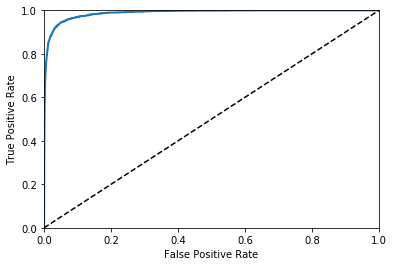

In [19]:
y_true = test_s1_label_new['intraparenchymal']
y_pred = sub_new['intraparenchymal']
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
plot_roc_curve(fpr, tpr)
plt.show()

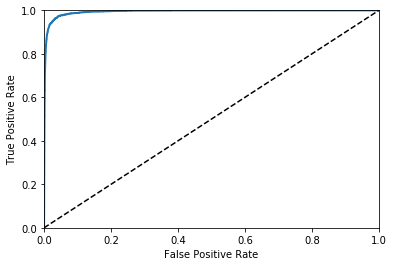

In [20]:
y_true = test_s1_label_new['intraventricular']
y_pred = sub_new['intraventricular']
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
plot_roc_curve(fpr, tpr)
plt.show()

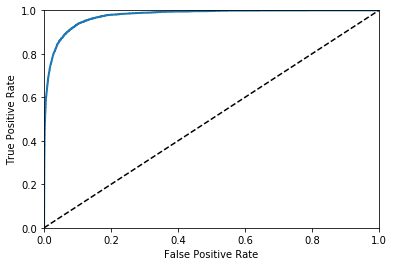

In [21]:
y_true = test_s1_label_new['subarachnoid']
y_pred = sub_new['subarachnoid']
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
plot_roc_curve(fpr, tpr)
plt.show()

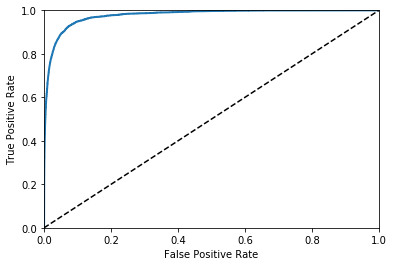

In [22]:
y_true = test_s1_label_new['subdural']
y_pred = sub_new['subdural']
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
plot_roc_curve(fpr, tpr)
plt.show()